In [1]:
import pandas as pd
import numpy as np

In [5]:
equip = pd.read_csv("russia_losses_equipment_correction.csv")
person = pd.read_csv("russia_losses_personnel.csv")

In [6]:
e_na = equip.isna().sum()
print(e_na)
p_na = person.isna().sum()
print("---------------------")
print(p_na)

date                       0
day                        0
aircraft                   0
helicopter                 0
tank                       0
APC                        0
field artillery            0
MRL                        0
drone                      0
naval ship                 0
submarines                 0
anti-aircraft warfare      0
special equipment          0
vehicles and fuel tanks    0
cruise missiles            0
dtype: int64
---------------------
date            0
day             0
personnel       0
personnel*      0
POW           802
dtype: int64


In [2]:
import matplotlib.pyplot as plt

In [8]:
equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     9 non-null      object
 1   day                      9 non-null      int64 
 2   aircraft                 9 non-null      int64 
 3   helicopter               9 non-null      int64 
 4   tank                     9 non-null      int64 
 5   APC                      9 non-null      int64 
 6   field artillery          9 non-null      int64 
 7   MRL                      9 non-null      int64 
 8   drone                    9 non-null      int64 
 9   naval ship               9 non-null      int64 
 10  submarines               9 non-null      int64 
 11  anti-aircraft warfare    9 non-null      int64 
 12  special equipment        9 non-null      int64 
 13  vehicles and fuel tanks  9 non-null      int64 
 14  cruise missiles          9 non-null      int64

In [9]:
equip.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,submarines,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles
0,2022-10-13,231,0,0,0,-25,32,0,20,1,0,0,0,0,0
1,2023-05-27,458,3,2,-5,7,8,2,49,0,0,0,0,11,31
2,2023-10-03,587,-1,0,5,0,0,0,-1,0,0,0,0,0,0
3,2024-03-13,749,0,0,0,0,0,0,-1,0,0,0,0,0,-1
4,2024-05-05,802,0,0,0,5,43,1,0,0,0,0,-3,44,19


In [10]:
equip = equip.sort_values(by = 'date')

In [11]:
equip.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,submarines,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles
0,2022-10-13,231,0,0,0,-25,32,0,20,1,0,0,0,0,0
1,2023-05-27,458,3,2,-5,7,8,2,49,0,0,0,0,11,31
2,2023-10-03,587,-1,0,5,0,0,0,-1,0,0,0,0,0,0
3,2024-03-13,749,0,0,0,0,0,0,-1,0,0,0,0,0,-1
4,2024-05-05,802,0,0,0,5,43,1,0,0,0,0,-3,44,19


In [12]:
equip['date'] = pd.to_datetime(equip['date'])

In [13]:
equip.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,submarines,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles
0,2022-10-13,231,0,0,0,-25,32,0,20,1,0,0,0,0,0
1,2023-05-27,458,3,2,-5,7,8,2,49,0,0,0,0,11,31
2,2023-10-03,587,-1,0,5,0,0,0,-1,0,0,0,0,0,0
3,2024-03-13,749,0,0,0,0,0,0,-1,0,0,0,0,0,-1
4,2024-05-05,802,0,0,0,5,43,1,0,0,0,0,-3,44,19


In [14]:
equip.describe()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,submarines,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles
count,9,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.0,9.000000,9.000000,9.000000
mean,2024-01-10 08:00:00,686.111111,0.222222,0.222222,0.0,-1.444444,9.222222,0.333333,11.777778,0.111111,0.0,0.0,-0.333333,6.111111,6.222222
min,2022-10-13 00:00:00,231.000000,-1.000000,0.000000,-5.0,-25.000000,0.000000,0.000000,-1.000000,0.000000,0.0,0.0,-3.000000,0.000000,-1.000000
25%,2023-10-03 00:00:00,587.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,2024-05-05 00:00:00,802.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,2024-05-29 00:00:00,826.000000,0.000000,0.000000,0.0,0.000000,8.000000,0.000000,20.000000,0.000000,0.0,0.0,0.000000,0.000000,6.000000
max,2024-06-23 00:00:00,850.000000,3.000000,2.000000,5.0,7.000000,43.000000,2.000000,49.000000,1.000000,0.0,0.0,0.000000,44.000000,31.000000
std,NaN,217.405982,1.092906,0.666667,2.5,9.221051,16.475571,0.707107,17.802934,0.333333,0.0,0.0,1.000000,14.666667,11.244752


In [15]:
person['date'] = pd.to_datetime(person['date']).fillna(0)
person['POW']  = pd.to_datetime(person['POW'])
person.columns
person.head(10)

,date,day,personnel,personnel*,POW
0,2024-07-07,865,550990,about,NaT
1,2024-07-06,864,549840,about,NaT
2,2024-07-05,863,548580,about,NaT
3,2024-07-04,862,547470,about,NaT
4,2024-07-03,861,546270,about,NaT
5,2024-07-02,860,545090,about,NaT
6,2024-07-01,859,543810,about,NaT
7,2024-06-30,858,542700,about,NaT
8,2024-06-29,857,541560,about,NaT
9,2024-06-28,856,540490,about,NaT


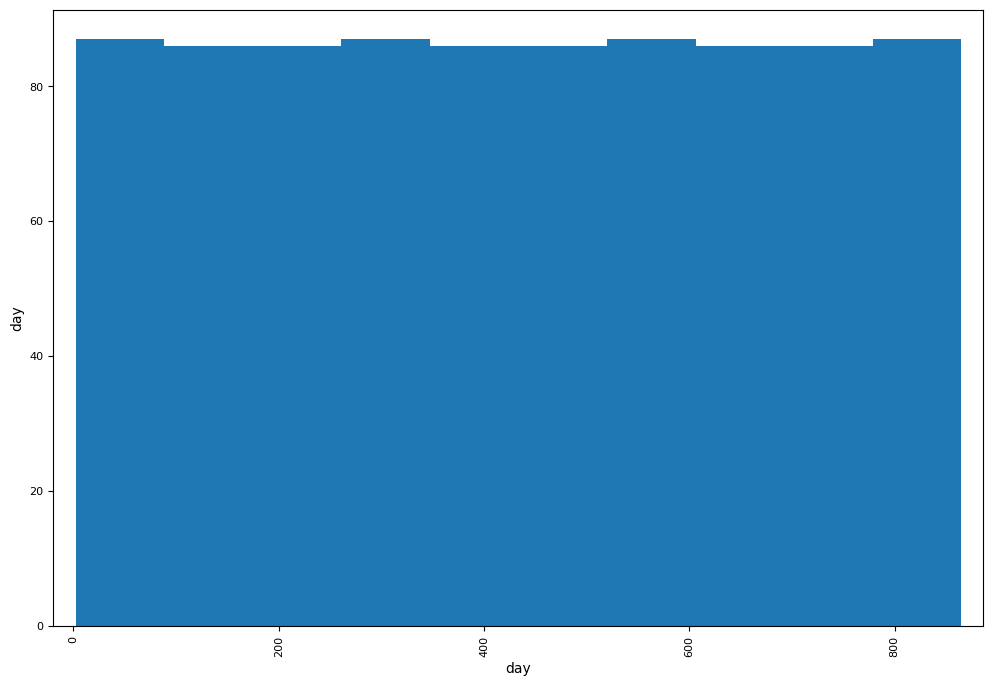

In [16]:
from pandas.plotting import scatter_matrix
attributes = ['day', 'date', 'POW']
scatter_matrix(person[attributes],figsize=(12,8))
plt.show()

In [17]:
import pandas as pd
data = pd.Series([0.25,0.5,0.75,1.0])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
